# Diabetes prediction Model 

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
# Load the dataset
data = pd.read_csv('diabetes.csv')



## Preprocessing

In [4]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
class_count_0,class_count_1=data.Outcome.value_counts()
df_0=data[data['Outcome']==0]
df_1=data[data['Outcome']==1]

In [6]:
df_0.shape

(500, 9)

In [7]:
a=df_0.sample(class_count_1)
df_under=pd.concat([a,df_1],axis=0)
print(df_under.Outcome.value_counts())
df_under

Outcome
0    268
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
166,3,148,66,25,0,32.5,0.256,22,0
491,2,89,90,30,0,33.5,0.292,42,0
525,3,87,60,18,0,21.8,0.444,21,0
103,1,81,72,18,40,26.6,0.283,24,0
497,2,81,72,15,76,30.1,0.547,25,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [8]:
# Display the first few rows of the dataset
data.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Explore basic statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Check for missing values
data.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#number of rows and columns in this dataset
data.shape

(768, 9)

In [12]:
#To count the number of Diabetic patients
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Diabetic patient--->1
### Non-Diabetic patient--->0


In [13]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
#dropping the outcome column or seperating the data and labels
D = data.drop(columns = 'Outcome',axis=1)
K = data['Outcome']

In [15]:
D

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
K

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Data Standardization

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(D)

StandardScaler()

In [19]:
standardized_data = scaler.transform(D)

In [20]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
D = standardized_data
K = data['Outcome']

In [22]:
print(D)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
print(K)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Visualization 

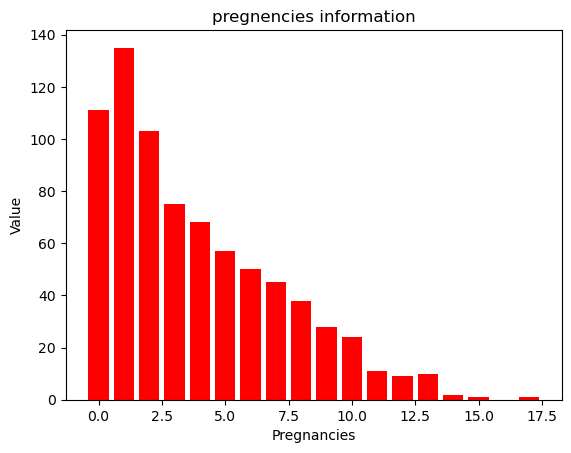

In [24]:
a=data['Pregnancies'].value_counts()
b=([1,0,2,3,4,5,6,7,8,9,10,11,13,12,14,15,17])

plt.bar(b,a,color='red')
      
plt.xlabel('Pregnancies')
plt.ylabel('Value')
plt.title('pregnencies information')
plt.show()

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64
[29 10 11  0 12  9  5  8 32 33  9 13 36 38 30 11 10 10 12 11  6 29 20  8
 30 20 22  1 36 17 39  7  1  7 24 12 14 25  6 35  5 16 27 33 19  4  8  1
 10  3  1  5  9 37 21  0 20 10 23  1  0 18 15  3 21 11 17 33  4  6  7  5
 21  2  1  1 20  6  5  3  1  1 15  1 16  6 24  5 22  3  0 13 21 39  0 19
  3  1  2 10 12  1  0  3  6  0  6 16  4  3  3 25  2  4 18 40 17  4  1  0
  4  3  2 48  2  5  9  2 19 41 12 12  9 18  5 10  0  1  8  7 34 17  1 21
  2  0 20 13 44  1  3 16 21  2 22 15  0  2  1 26 15 24  6  0 11 20  1 13
  8  8 15  8  4  2 12 15 21  5 26 16 11  2  0  6 19 20 39 12 10  4  0 19
 15 19 21  8  0  2  5  8  0  7 11  6 34  6 36 31  0 20  4  3 39  3 15 17
  4 11 11 20  0 45 16 40  5  1  5  3 10  3  1 25  1  8  2  5 30  2 11  6
  0  1  1 12  8 28 20  2 13  2 21  6  3  4 23  0  9  4  3 30 13  6  3 42
 14 22  4  3  0  7 17  0 19  0 31  4  8  2 36  1  

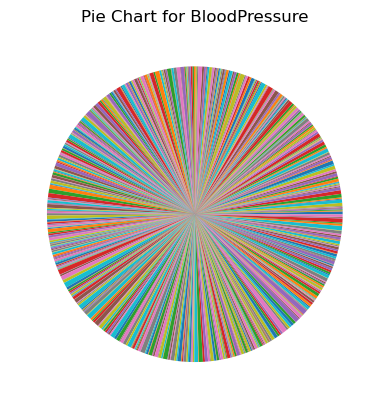

In [25]:
from sklearn.preprocessing import LabelEncoder
data1=data['Age']
print(data1)
le=LabelEncoder()
encoded_data=le.fit_transform(data1)
print(encoded_data)
#Create a pie chart
plt.pie(encoded_data)
plt.title("Pie Chart for BloodPressure")
plt.show()

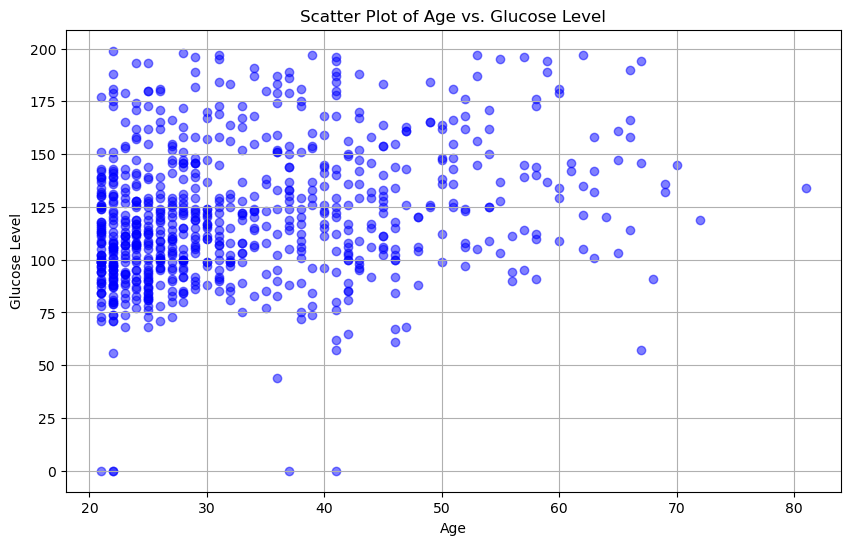

In [26]:
age=data['Age']
glucose=data['Glucose']
#create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(age,glucose,color='blue',alpha=0.5)
plt.title('Scatter Plot of Age vs. Glucose Level')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.show()

## Train Test Split

In [27]:
D_train,D_test,K_train,K_test = train_test_split(D,K,test_size=0.2,random_state=2) 

In [28]:
print(D.shape,D_train.shape,D_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the model

In [29]:
classifier =svm.SVC(kernel='linear')

In [30]:
classifier.fit(D_train,K_train)

SVC(kernel='linear')

## ModelEvaluation
### Accuracy Score

In [31]:
D_train_prediction = classifier.predict(D_train)
training_data_accuracy = accuracy_score(D_train_prediction, K_train)
print("Accuracy Score of Training Data",training_data_accuracy)

Accuracy Score of Training Data 0.7719869706840391


In [32]:
D_test_prediction = classifier.predict(D_test)
test_data_accuracy = accuracy_score(D_test_prediction, K_test)
print("Accuracy Score of Test Data",test_data_accuracy)

Accuracy Score of Test Data 0.7662337662337663


In [33]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(D_train, K_train)
rf_predictions = rf_classifier.predict(D_test)
Rf_predictions = rf_classifier.predict(D_train)

# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(D_train, K_train)
lr_predictions = lr_classifier.predict(D_test)
Lr_predictions = lr_classifier.predict(D_train)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(random_state=2)
svm_classifier.fit(D_train, K_train)
svm_predictions = svm_classifier.predict(D_test)
Svm_predictions = svm_classifier.predict(D_train)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(D_train, K_train)
dt_predictions = dt_classifier.predict(D_test)
Dt_predictions = dt_classifier.predict(D_train)

In [34]:
# Training Accuracy

Rf_accuracy = accuracy_score(K_train, Rf_predictions)
Lr_accuracy = accuracy_score(K_train, Lr_predictions)
Dt_accuracy = accuracy_score(K_train, Dt_predictions)
Svm_accuracy = accuracy_score(K_train, Svm_predictions)

print("Random Forest Classifier Accuracy:", Rf_accuracy)
print("Logistic Regression Classifier Accuracy:", Lr_accuracy)
print("Decision Tree Classifier Accuracy:", Dt_accuracy)
print("Support Vector Machine (SVM) Classifier Accuracy:", Svm_accuracy)



  

Random Forest Classifier Accuracy: 1.0
Logistic Regression Classifier Accuracy: 0.7801302931596091
Decision Tree Classifier Accuracy: 1.0
Support Vector Machine (SVM) Classifier Accuracy: 0.8306188925081434


In [35]:
# Testing Accuracy
rf_accuracy = accuracy_score(K_test, rf_predictions)
lr_accuracy = accuracy_score(K_test, lr_predictions)
dt_accuracy = accuracy_score(K_test, dt_predictions)
svm_accuracy = accuracy_score(K_test, svm_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Logistic Regression Classifier Accuracy:", lr_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Support Vector Machine (SVM) Classifier Accuracy:", svm_accuracy)

Random Forest Classifier Accuracy: 0.7792207792207793
Logistic Regression Classifier Accuracy: 0.7662337662337663
Decision Tree Classifier Accuracy: 0.7142857142857143
Support Vector Machine (SVM) Classifier Accuracy: 0.7402597402597403


In [36]:
# Additional metrics and information
print("\nRandom Forest Classifier Report:")
print(classification_report(K_test, rf_predictions))

print("\nLogistic Regression Classifier Report:")
print(classification_report(K_test, lr_predictions))

print("\nDecision Tree Classifier Report:")
print(classification_report(K_test, dt_predictions))

print("\nSupport Vector Machine (SVM) Classifier Report:")
print(classification_report(K_test, svm_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.63      0.60      0.61        45

    accuracy                           0.78       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.78      0.78      0.78       154


Logistic Regression Classifier Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       109
           1       0.51      0.60      0.55        45

    accuracy                           0.71       154
   macro avg       0

# Making a  Predictive Model 

In [37]:
input_data = (6,148,72,35,0,33.6,0.627,50) #5,116,74,0,0,25.6,0.201,30 -->0  #6,148,72,35,0,33.6,0.627,50 -->1 

#changing the input_data to numpy Array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person is diabetic


# Final Model

In [39]:
#Get input as a string and split it into a list of strings
input_str = input("Enter the Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age, respectively: ")
input_list = input_str.split(',')

#Convert the list of strings to a list of floats
input_data = [float(value) for value in input_list]

#changing the input_data to numpy Array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

Enter the Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age, respectively: 5,116,74,0,0,25.6,0.201,30
[[ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
  -0.81807858 -0.27575966]]
[0]
The person is not diabetic
